   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  
Confusion Matrix:
 [[79 20]
 [27 28]]
Accuracy: 0.6948
Error Rate: 0.3052
Precision: 0.5833
Recall: 0.5091


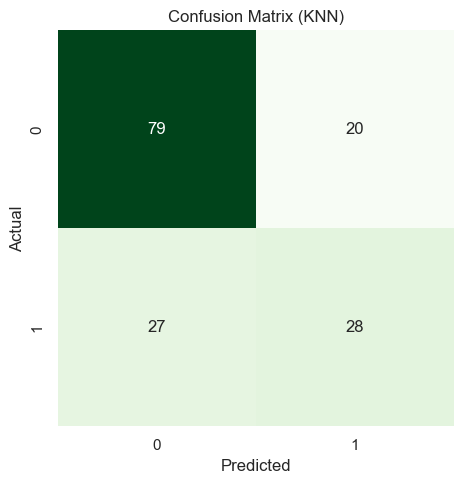

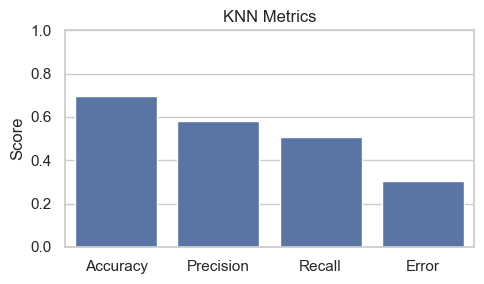

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load dataset (make sure diabetes.csv is in the working directory)
df = pd.read_csv("diabetes.csv")
print(df.head())

# Features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN model (you can tune n_neighbors for better accuracy)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Metrics
acc = accuracy_score(y_test, y_pred)
err = 1 - acc
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", round(acc, 4))
print("Error Rate:", round(err, 4))
print("Precision:", round(prec, 4))
print("Recall:", round(rec, 4))


# ---------------------------------------------
# YOUR REQUIRED PLOTS (ADDED AS-IT-IS)
# ---------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix heatmap
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            cbar=False, square=True)
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Bar plot of metrics
plt.figure(figsize=(5,3))
sns.barplot(x=["Accuracy", "Precision", "Recall", "Error"],
            y=[acc, prec, rec, err])
plt.ylim(0, 1)
plt.title("KNN Metrics")
plt.ylabel("Score")
plt.tight_layout()
plt.show()
